<a href="https://colab.research.google.com/github/preetamjumech/telco-churn-ibm-dataset-xgboost-hyperparameter--tuning/blob/main/Telco_Churn_Dataset_XgBoost_colab__28_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_excel("Telco_customer_churn.xlsx")
df.head(20)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [3]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [4]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
df["Churn Label"].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [6]:
df[df["Churn Label"]=="No"]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [7]:
df.drop(["Churn Label","Churn Score","CLTV","Churn Reason"],axis=1,inplace=True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [8]:
df["Count"].unique()

array([1])

In [9]:
df["Country"].unique()

array(['United States'], dtype=object)

In [10]:
df["State"].unique()

array(['California'], dtype=object)

In [11]:
df["City"].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [12]:
df.drop(["CustomerID","Count","Country","State","Lat Long"],axis=1,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [13]:
df["City"].replace(" ","_",regex=True,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [14]:
df["City"].unique()[:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [15]:
df.columns = df.columns.str.replace(" ","_",)

In [16]:
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [17]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [18]:
for col in df.columns:
  print(col,df[col].unique())
  print()

City ['Los_Angeles' 'Beverly_Hills' 'Huntington_Park' ... 'Standish' 'Tulelake'
 'Olympic_Valley']

Zip_Code [90003 90005 90006 ... 96128 96134 96146]

Latitude [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]

Longitude [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]

Gender ['Male' 'Female']

Senior_Citizen ['No' 'Yes']

Partner ['No' 'Yes']

Dependents ['No' 'Yes']

Tenure_Months [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]

Phone_Service ['Yes' 'No']

Multiple_Lines ['No' 'Yes' 'No phone service']

Internet_Service ['DSL' 'Fiber optic' 'No']

Online_Security ['Yes' 'No' 'No internet service']

Online_Backup ['Yes' 'No' 'No internet service']

Device_Protection ['No' 'Yes' 'No internet service']

Tech_Support ['No' 'Yes' 'No internet service']

Streaming_TV ['

In [ ]:
#df["Total_Charges"]=pd.to_numeric(df["Total_Charges"])
# so, there are blank spaces in Total_Charges column

ValueError: ignored

In [19]:
df.loc[df["Total_Charges"]==" "]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [20]:
df.loc[(df["Total_Charges"]==" ","City")]

2234    San_Bernardino
2438      Independence
2568         San_Mateo
2667         Cupertino
2856          Redcrest
4331       Los_Angeles
4687          Sun_City
5104        Ben_Lomond
5719          La_Verne
6772              Bell
6840        Wilmington
Name: City, dtype: object

In [21]:
df.loc[(df["Total_Charges"]==" ","Total_Charges")]

2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total_Charges, dtype: object

In [22]:
df.loc[(df["Total_Charges"]==" ","Total_Charges")]=0

In [23]:
df.loc[df["Tenure_Months"]==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [24]:
df["Total_Charges"]=pd.to_numeric(df["Total_Charges"])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [25]:
df.replace(" ","_",regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [26]:
X=df.drop("Churn_Value",axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [27]:
y=df["Churn_Value"].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

In [28]:
pd.get_dummies(X,columns=["Payment_Method"]).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [29]:
X_encoded = pd.get_dummies(X,columns=["City",
                                      "Gender",
                                      "Senior_Citizen",
                                      "Partner",
                                      "Dependents",
                                      "Phone_Service",
                                      "Multiple_Lines",
                                      "Internet_Service",
                                      "Online_Security",
                                      "Online_Backup",
                                      "Device_Protection",
                                      "Tech_Support",
                                      "Streaming_TV",
                                      "Streaming_Movies",
                                      "Contract",
                                      "Paperless_Billing",
                                      "Payment_Method"
])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [30]:
sum(y)/len(y)

0.2653698707936959

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42,stratify=y)

In [32]:
sum(y_train)/len(y_train)

0.2654297614539947

In [33]:
sum(y_test)/len(y_test)

0.26519023282226006

In [34]:
import xgboost as xgb 

In [38]:
clf_xgb=xgb.XGBClassifier(objective="binary:logistic",missing=None,random_state=42)
clf_xgb.fit(X_train,y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric="aucpr",
            eval_set=[(X_test,y_test)]
            )

[0]	validation_0-aucpr:0.578392
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.580597
[2]	validation_0-aucpr:0.590099
[3]	validation_0-aucpr:0.601636
[4]	validation_0-aucpr:0.608932
[5]	validation_0-aucpr:0.603821
[6]	validation_0-aucpr:0.618314
[7]	validation_0-aucpr:0.610906
[8]	validation_0-aucpr:0.620122
[9]	validation_0-aucpr:0.62495
[10]	validation_0-aucpr:0.629252
[11]	validation_0-aucpr:0.628517
[12]	validation_0-aucpr:0.650051
[13]	validation_0-aucpr:0.649035
[14]	validation_0-aucpr:0.650546
[15]	validation_0-aucpr:0.652876
[16]	validation_0-aucpr:0.654922
[17]	validation_0-aucpr:0.655347
[18]	validation_0-aucpr:0.655818
[19]	validation_0-aucpr:0.655958
[20]	validation_0-aucpr:0.656236
[21]	validation_0-aucpr:0.655564
[22]	validation_0-aucpr:0.656688
[23]	validation_0-aucpr:0.657409
[24]	validation_0-aucpr:0.656236
[25]	validation_0-aucpr:0.655347
[26]	validation_0-aucpr:0.656541
[27]	validation_0-aucpr:0.657225
[28]	validation_0-auc

XGBClassifier(random_state=42)

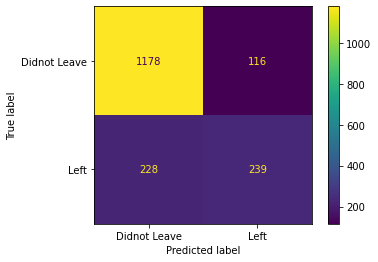

In [40]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Didnot Leave","Left"]
)

#### out of 1294 , only 1178 (91%) were correctly classified,
out of 467, only 239 (51%) were correctly classified.

In [42]:
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]

}
optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective="binary:logistic",
        seed=42,
        subsample=0.9,
        colsample_bytree=0.5),
        param_grid=param_grid,
        verbose=True,
        scoring='roc_auc',
        n_jobs=10,
        cv=3
)

In [44]:
optimal_params.fit(X_train,y_train)
print(optimal_params.best_score_)
print(optimal_params.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
0.8660056283302017
{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


In [45]:
param_grid = {
    'max_depth':[5,6,7],
    'learning_rate':[0.05],
    'gamma':[1.0],
    'reg_lambda':[10.0,25.0,100.0],
    'scale_pos_weight':[3]

}
optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective="binary:logistic",
        seed=42,
        subsample=0.9,
        colsample_bytree=0.5),
        param_grid=param_grid,
        verbose=True,
        scoring='roc_auc',
        n_jobs=10,
        cv=3
)

In [46]:
optimal_params.fit(X_train,y_train)
print(optimal_params.best_score_)
print(optimal_params.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.8660056283302017
{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


In [47]:
clf_xgb=xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    max_depth=5,
    learning_rate=0.05,
    gamma=1,
    reg_lambda=10,
    scale_pos_weight=3,
    subsample=0.9,
    colsample_bytree=0.5
    )

clf_xgb.fit(X_train,y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric="aucpr",
            eval_set=[(X_test,y_test)]
            )

[0]	validation_0-aucpr:0.531711
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.619159
[2]	validation_0-aucpr:0.63363
[3]	validation_0-aucpr:0.636231
[4]	validation_0-aucpr:0.632088
[5]	validation_0-aucpr:0.630999
[6]	validation_0-aucpr:0.637234
[7]	validation_0-aucpr:0.639194
[8]	validation_0-aucpr:0.637036
[9]	validation_0-aucpr:0.636654
[10]	validation_0-aucpr:0.636897
[11]	validation_0-aucpr:0.63576
[12]	validation_0-aucpr:0.636968
[13]	validation_0-aucpr:0.637358
[14]	validation_0-aucpr:0.637249
[15]	validation_0-aucpr:0.637224
[16]	validation_0-aucpr:0.637049
[17]	validation_0-aucpr:0.637244
Stopping. Best iteration:
[7]	validation_0-aucpr:0.639194



XGBClassifier(colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5,
              random_state=42, reg_lambda=10, scale_pos_weight=3,
              subsample=0.9)

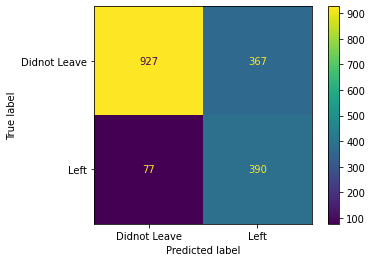

In [48]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Didnot Leave","Left"]
)

### out of 1294 ,  927 (71%) were correctly classified,
### out of 467, only 390 (83%) were correctly classified.

In [49]:
clf_xgb=xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    max_depth=5,
    learning_rate=0.05,
    gamma=1,
    reg_lambda=10,
    scale_pos_weight=3,
    subsample=0.9,
    colsample_bytree=0.5,
    n_estimators=1
    )

clf_xgb.fit(X_train,y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric="aucpr",
            eval_set=[(X_test,y_test)]
            )

[0]	validation_0-aucpr:0.531711
Will train until validation_0-aucpr hasn't improved in 10 rounds.


XGBClassifier(colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5,
              n_estimators=1, random_state=42, reg_lambda=10,
              scale_pos_weight=3, subsample=0.9)

weight: {'Contract_Month-to-month': 1, 'Streaming_Movies_Yes': 1, 'Payment_Method_Electronic_check': 2, 'Zip_Code': 3, 'City_Atherton': 1, 'Longitude': 6, 'Tech_Support_Yes': 3, 'Paperless_Billing_No': 3, 'City_Pomona': 1, 'Online_Security_No_internet_service': 1, 'Streaming_TV_No': 1, 'City_Bakersfield': 1, 'Gender_Female': 1, 'City_San_Diego': 1}
gain: {'Contract_Month-to-month': 1631.77637, 'Streaming_Movies_Yes': 67.3808594, 'Payment_Method_Electronic_check': 50.922088650000006, 'Zip_Code': 4.1905870400000005, 'City_Atherton': 6.37127686, 'Longitude': 6.024590809999999, 'Tech_Support_Yes': 23.726112366666666, 'Paperless_Billing_No': 11.545668280000001, 'City_Pomona': 8.24819946, 'Online_Security_No_internet_service': 213.820374, 'Streaming_TV_No': 5.55446959, 'City_Bakersfield': 8.27160645, 'Gender_Female': 1.0939008, 'City_San_Diego': 4.95553207}
cover: {'Contract_Month-to-month': 1820.25, 'Streaming_Movies_Yes': 609.5, 'Payment_Method_Electronic_check': 701.25, 'Zip_Code': 104.25

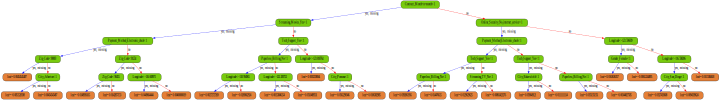

In [51]:
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
  print('%s:' % importance_type, bst.get_score(importance_type=importance_type))

node_params={'shape':"box",
               'style':"filled,rounded",
               'fillcolor':'#78cbe'}
leaf_params={'shape':"box",
               'style':"filled,rounded",
               'fillcolor':'#e48038'}

xgb.to_graphviz(clf_xgb,num_trees=0,size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)